# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


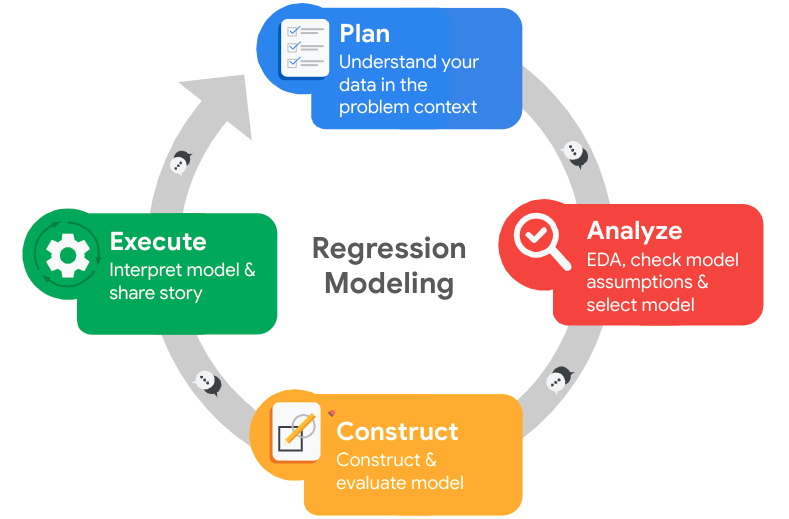

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

import plotly.express as px
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt



### Load dataset

`Pandas` is used to read the dataset 


In [2]:
# Import data


df=pd.read_csv("HR_comma_sep.csv")
df.head(10)


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
#shape of the data
df.shape

(14999, 10)

In [4]:
#columns by name
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
df.describe()


satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
df.rename(columns = {'Work_accident':'workplace_acciedent_count','Department':'department','last_evaluation':'last_evaluation_score',
                    'salary':'salary_range','time_spend_company':'years_of_working', 
                     'number_project':'project_count','left':'employment_status','average_montly_hours':'average_monthly_hours'}, inplace = True)
df.columns



Index(['satisfaction_level', 'last_evaluation_score', 'project_count',
       'average_monthly_hours', 'years_of_working',
       'workplace_acciedent_count', 'employment_status',
       'promotion_last_5years', 'department', 'salary_range'],
      dtype='object')

In [9]:
df.head()

satisfaction_level  last_evaluation_score  project_count  \
0                0.38                   0.53              2   
1                0.80                   0.86              5   
2                0.11                   0.88              7   
3                0.72                   0.87              5   
4                0.37                   0.52              2   

   average_monthly_hours  years_of_working  workplace_acciedent_count  \
0                    157                 3                          0   
1                    262                 6                          0   
2                    272                 4                          0   
3                    223                 5                          0   
4                    159                 3                          0   

   employment_status  promotion_last_5years department salary_range  
0                  1                      0      sales          low  
1                  1                      0      sales       medium  
2                  1                      0      sales       medium  
3                  1                      0      sales          low  
4                  1                      0      sales          low

In [10]:
df.rename(columns={'Work_accident':'workplace_accident_count'})
df.columns

Index(['satisfaction_level', 'last_evaluation_score', 'project_count',
       'average_monthly_hours', 'years_of_working',
       'workplace_acciedent_count', 'employment_status',
       'promotion_last_5years', 'department', 'salary_range'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [11]:
# Check for missing values
df.isnull()


satisfaction_level  last_evaluation_score  project_count  \
0                   False                  False          False   
1                   False                  False          False   
2                   False                  False          False   
3                   False                  False          False   
4                   False                  False          False   
...                   ...                    ...            ...   
14994               False                  False          False   
14995               False                  False          False   
14996               False                  False          False   
14997               False                  False          False   
14998               False                  False          False   

       average_monthly_hours  years_of_working  workplace_acciedent_count  \
0                      False             False                      False   
1                      False             False                      False   
2                      False             False                      False   
3                      False             False                      False   
4                      False             False                      False   
...                      ...               ...                        ...   
14994                  False             False                      False   
14995                  False             False                      False   
14996                  False             False                      False   
14997                  False             False                      False   
14998                  False             False                      False   

       employment_status  promotion_last_5years  department  salary_range  
0                  False                  False       False         False  
1                  False                  False       False         False  
2                  False                  False       False         False  
3                  False                  False       False         False  
4                  False                  False       False         False  
...                  ...                    ...         ...           ...  
14994              False                  False       False         False  
14995              False                  False       False         False  
14996              False                  False       False         False  
14997              False                  False       False         False  
14998              False                  False       False         False  

[14999 rows x 10 columns]

In [12]:
#confirm
null_sum =df.isnull().sum()
print(null_sum)

satisfaction_level           0
last_evaluation_score        0
project_count                0
average_monthly_hours        0
years_of_working             0
workplace_acciedent_count    0
employment_status            0
promotion_last_5years        0
department                   0
salary_range                 0
dtype: int64


### Check duplicates

Check for any duplicate entries in the data.

In [13]:
# Check for duplicates
df.duplicated().sum()


3008

In [14]:
df2 = len(df)-len(df.drop_duplicates())
print(df2)

3008


In [15]:
# Inspect some rows containing duplicates as needed
duplicate_rows = df[df.duplicated()]
duplicate_rows.head()

satisfaction_level  last_evaluation_score  project_count  \
396                 0.46                   0.57              2   
866                 0.41                   0.46              2   
1317                0.37                   0.51              2   
1368                0.41                   0.52              2   
1461                0.42                   0.53              2   

      average_monthly_hours  years_of_working  workplace_acciedent_count  \
396                     139                 3                          0   
866                     128                 3                          0   
1317                    127                 3                          0   
1368                    132                 3                          0   
1461                    142                 3                          0   

      employment_status  promotion_last_5years  department salary_range  
396                   1                      0       sales          low  
866                   1                      0  accounting          low  
1317                  1                      0       sales       medium  
1368                  1                      0       RandD          low  
1461                  1                      0       sales          low

In [16]:
# Inspect some rows containing duplicates as needed

#df3 = df.groupby(df.columns.tolist(), as_index=False).size()
df3 = df.groupby(df.columns.tolist()).size().reset_index(name='count')
df3.head(20)

satisfaction_level  last_evaluation_score  project_count  \
0                 0.09                   0.62              6   
1                 0.09                   0.77              5   
2                 0.09                   0.77              6   
3                 0.09                   0.77              6   
4                 0.09                   0.77              6   
5                 0.09                   0.77              6   
6                 0.09                   0.77              6   
7                 0.09                   0.77              6   
8                 0.09                   0.78              6   
9                 0.09                   0.78              6   
10                0.09                   0.78              6   
11                0.09                   0.78              6   
12                0.09                   0.78              7   
13                0.09                   0.79              6   
14                0.09                   0.79              6   
15                0.09                   0.79              6   
16                0.09                   0.80              5   
17                0.09                   0.80              6   
18                0.09                   0.80              6   
19                0.09                   0.80              6   

    average_monthly_hours  years_of_working  workplace_acciedent_count  \
0                     294                 4                          0   
1                     275                 4                          0   
2                     244                 4                          0   
3                     244                 4                          0   
4                     256                 5                          0   
5                     282                 5                          0   
6                     290                 4                          0   
7                     310                 4                          0   
8                     244                 4                          0   
9                     254                 4                          0   
10                    260                 4                          0   
11                    263                 4                          0   
12                    290                 4                          0   
13                    275                 4                          0   
14                    276                 4                          0   
15                    293                 5                          0   
16                    279                 4                          0   
17                    247                 4                          0   
18                    294                 4                          0   
19                    298                 4                          0   

    employment_status  promotion_last_5years   department salary_range  count  
0                   1                      0   accounting          low      3  
1                   1                      0  product_mng       medium      3  
2                   1                      0    marketing          low      1  
3                   1                      0  product_mng          low      1  
4                   1                      0      support       medium      1  
5                   1                      0        sales       medium      1  
6                   1                      0    technical       medium      3  
7                   1                      0           hr          low      1  
8                   1                      0           IT          low      1  
9                   1                      0      support          low      3  
10                  1                      0           IT       medium      1  
11                  1                      0    technical          low      1  
12                  1                      0   management       

In [17]:
#Confirm
total_count = df3["count"].sum()
print(total_count)

14999


In [18]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_clean=df.drop_duplicates()
df_clean.shape

(11991, 10)

Check for outliers in the data.

### Check outliers

In [19]:
df_clean.describe()

satisfaction_level  last_evaluation_score  project_count  \
count        11991.000000           11991.000000   11991.000000   
mean             0.629658               0.716683       3.802852   
std              0.241070               0.168343       1.163238   
min              0.090000               0.360000       2.000000   
25%              0.480000               0.570000       3.000000   
50%              0.660000               0.720000       4.000000   
75%              0.820000               0.860000       5.000000   
max              1.000000               1.000000       7.000000   

       average_monthly_hours  years_of_working  workplace_acciedent_count  \
count           11991.000000      11991.000000               11991.000000   
mean              200.473522          3.364857                   0.154282   
std                48.727813          1.330240                   0.361234   
min                96.000000          2.000000                   0.000000   
25%               157.000000          3.000000                   0.000000   
50%               200.000000          3.000000                   0.000000   
75%               243.000000          4.000000                   0.000000   
max               310.000000         10.000000                   1.000000   

       employment_status  promotion_last_5years  
count       11991.000000           11991.000000  
mean            0.166041               0.016929  
std             0.372133               0.129012  
min             0.000000               0.000000  
25%             0.000000               0.000000  
50%             0.000000               0.000000  
75%             0.000000               0.000000  
max             1.000000               1.000000

## Row 1 (satisfaction_level)

In [20]:

Q1 = df_clean.satisfaction_level.quantile(0.25)
Q3 = df_clean.satisfaction_level.quantile(0.75)
Q1, Q3

(0.48, 0.82)

In [21]:
IQR = Q3 - Q1
IQR

0.33999999999999997

In [22]:
lower_limit = Q1-1.5*IQR
upper_limit =Q3+1.5*IQR
lower_limit, upper_limit


(-0.030000000000000027, 1.33)

In [23]:
df_outliers = df_clean[(df_clean['satisfaction_level'] < lower_limit) | (df_clean['satisfaction_level'] > upper_limit)]

In [24]:
len(df_outliers)

0

In [25]:
fig4 = px.histogram(df_clean, x='satisfaction_level',nbins=10, title='Histogram of satisfaction_level',
                   labels={'last_evaluation-score':'Values', 'count':'Frequency'})
fig4.show()

##  Row two (last evaluation score)


In [26]:
Qa1 = df_clean.last_evaluation_score.quantile(0.25)
Qa3 = df_clean.last_evaluation_score.quantile(0.75)
Qa1, Qa3

(0.57, 0.86)

In [27]:
IQR1 = Qa3 - Qa1
IQR1

0.29000000000000004

In [28]:
lower_limit1 = Q1-1.5*IQR1
upper_limit1 =Q3+1.5*IQR1
lower_limit1, upper_limit1

(0.04499999999999993, 1.255)

In [29]:
df_outliers1 = df_clean[(df_clean['last_evaluation_score'] < lower_limit1) | (df_clean['last_evaluation_score'] > upper_limit1)]

In [30]:
len(df_outliers1)

0

In [31]:
fig2 = px.histogram(df_clean, x='last_evaluation_score',nbins=10, title='Histogram of last_evaluation_score',
                   labels={'last_evaluation-score':'Values', 'count':'Frequency'})
fig2.show()

##  Row 3 (project_count)

In [32]:
Q31 = df_clean.project_count.quantile(0.25)
Q33 = df_clean.project_count.quantile(0.75)
Q31, Q33

(3.0, 5.0)

In [33]:
IQR3 = Q33 - Q31
IQR3

2.0

In [34]:
lower_limit3 = Q31-1.5*IQR3
upper_limit3 =Q33+1.5*IQR3
lower_limit3, upper_limit3

(0.0, 8.0)

In [35]:
df_outliers3 = df_clean[(df_clean['project_count'] < lower_limit3) | (df_clean['project_count'] > upper_limit3)]
len(df_outliers3)

0

In [36]:
fig5 = px.histogram(df_clean, x ='project_count',nbins=10, title='Histogram of project_count',
                   labels={'last_evaluation-score':'Values', 'count':'Frequency'})
fig5.show()

## Row 4 (average_monthly-hours)

In [37]:
Q41 = df_clean.average_monthly_hours.quantile(0.25)
Q43 = df_clean.average_monthly_hours.quantile(0.75)
Q41, Q43

(157.0, 243.0)

In [38]:
IQR4 = Q43 - Q41
IQR4

86.0

In [39]:
lower_limit4 = Q41-1.5*IQR4
upper_limit4 =Q43+1.5*IQR4
lower_limit4, upper_limit4

(28.0, 372.0)

In [40]:
df_outliers4 = df_clean[(df_clean['average_monthly_hours'] < lower_limit4) | (df_clean['average_monthly_hours'] > upper_limit4)]
len(df_outliers4)

0

In [41]:
fig6 = px.histogram(df_clean, x ='average_monthly_hours',nbins=10, title='Histogram of average_monthly_hours',
                   labels={'last_evaluation-score':'Values', 'count':'Frequency'})
fig6.show()

## Row 5 (years of working)

In [42]:
Q1_5 = df_clean.years_of_working.quantile(0.25)
Q3_5 = df_clean.years_of_working.quantile(0.75)
Q1_5, Q3_5

(3.0, 4.0)

In [43]:
IQR_5 = Q3_5 - Q1_5
IQR_5

1.0

In [44]:
lower_limit5 = Q1_5-1.5*IQR_5
upper_limit5 =Q3_5+1.5*IQR_5
lower_limit5, upper_limit5

(1.5, 5.5)

In [45]:
df_outliers5 = df_clean[(df_clean['years_of_working'] < lower_limit5) | (df_clean['years_of_working'] > upper_limit5)]
len(df_outliers5)

824

In [46]:
# Hitsogram With outliers
fig = px.histogram(df_clean, x='years_of_working', nbins=10, title='Histogram of years_of_working',
                   labels={'ColumnName': 'Values', 'count': 'Frequency'})


fig.show()

In [47]:
fig = px.box(df_clean, y='years_of_working', title='Box Plot of Years of Working')


fig.show()

In [48]:
df_clean1 = df_clean[(df_clean['years_of_working'] >= lower_limit5) & (df_clean['years_of_working'] <= upper_limit5)]
df_clean1.describe()

satisfaction_level  last_evaluation_score  project_count  \
count        11167.000000           11167.000000   11167.000000   
mean             0.631944               0.715901       3.786066   
std              0.239064               0.167595       1.164198   
min              0.090000               0.360000       2.000000   
25%              0.490000               0.570000       3.000000   
50%              0.660000               0.720000       4.000000   
75%              0.820000               0.860000       5.000000   
max              1.000000               1.000000       7.000000   

       average_monthly_hours  years_of_working  workplace_acciedent_count  \
count           11167.000000      11167.000000               11167.000000   
mean              200.144533          3.109161                   0.152413   
std                48.563047          0.899277                   0.359437   
min                96.000000          2.000000                   0.000000   
25%               157.000000          2.000000                   0.000000   
50%               199.000000          3.000000                   0.000000   
75%               243.000000          4.000000                   0.000000   
max               310.000000          5.000000                   1.000000   

       employment_status  promotion_last_5years  
count       11167.000000           11167.000000  
mean            0.168532               0.014417  
std             0.374355               0.119209  
min             0.000000               0.000000  
25%             0.000000               0.000000  
50%             0.000000               0.000000  
75%             0.000000               0.000000  
max             1.000000               1.000000

In [49]:
df_clean.shape

(11991, 10)

In [50]:
df_clean1.shape

(11167, 10)

In [51]:
#Histogram without outliers 
fig = px.histogram(df_clean1, x='years_of_working', nbins=10, title='Histogram of years_of_working',
                   labels={'ColumnName': 'Values', 'count': 'Frequency'})


fig.show()

## Row 6 (worplace_accident_count)

In [52]:
Q1_6 = df_clean.workplace_acciedent_count.quantile(0.25)
Q3_6 = df_clean.workplace_acciedent_count.quantile(0.75)
Q1_6, Q3_6

(0.0, 0.0)

In [53]:
unique_values = df_clean['workplace_acciedent_count'].unique()

print(unique_values)

[0 1]


## Row 7 (employement status)

In [54]:
Q1_7 = df_clean.employment_status.quantile(0.25)
Q3_7 = df_clean.employment_status.quantile(0.75)
Q1_7, Q3_7

(0.0, 0.0)

In [55]:
unique_values1 = df_clean['employment_status'].unique()

print(unique_values1)

[1 0]


## Row 8 (Promotion_last_5years)

In [56]:
Q1_8 = df_clean.promotion_last_5years.quantile(0.25)
Q3_8 = df_clean.promotion_last_5years.quantile(0.75)
Q1_8, Q3_8

(0.0, 0.0)

In [57]:
unique_values2 = df['promotion_last_5years'].unique()

print(unique_values2)

[0 1]


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.


- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [58]:
df_clean1.isna().sum()

satisfaction_level           0
last_evaluation_score        0
project_count                0
average_monthly_hours        0
years_of_working             0
workplace_acciedent_count    0
employment_status            0
promotion_last_5years        0
department                   0
salary_range                 0
dtype: int64

In [59]:
#creating a new column by taking the difference between the last evaluation score and the current satisfaction level
df_clean1["Score_variance"] = df_clean1["last_evaluation_score"]-df_clean1["satisfaction_level"]

C:\Users\Admin\AppData\Local\Temp\ipykernel_10636\345820820.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
df_clean1.head()

satisfaction_level  last_evaluation_score  project_count  \
0                0.38                   0.53              2   
2                0.11                   0.88              7   
3                0.72                   0.87              5   
4                0.37                   0.52              2   
5                0.41                   0.50              2   

   average_monthly_hours  years_of_working  workplace_acciedent_count  \
0                    157                 3                          0   
2                    272                 4                          0   
3                    223                 5                          0   
4                    159                 3                          0   
5                    153                 3                          0   

   employment_status  promotion_last_5years department salary_range  \
0                  1                      0      sales          low   
2                  1                      0      sales       medium   
3                  1                      0      sales          low   
4                  1                      0      sales          low   
5                  1                      0      sales          low   

   Score_variance  
0            0.15  
2            0.77  
3            0.15  
4            0.15  
5            0.09

## Number of employees who left vs. stayed

In [61]:

employement_status_totals = df_clean1.groupby('employment_status').size().reset_index(name='count')

print(employement_status_totals)



   employment_status  count
0                  0   9285
1                  1   1882


In [62]:
df_clean1["employment_status"].value_counts()

0    9285
1    1882
Name: employment_status, dtype: int64

##  Percentages of empolyees who left vs stayed

In [63]:

employment_status_percents= df_clean1['employment_status'].value_counts(normalize=True).reset_index(
    name='percentage'). apply(lambda x: x * 100)


print(employment_status_percents)


   index  percentage
0      0   83.146772
1    100   16.853228


## factors leadind to attrition

In [64]:
df_clean1.groupby('employment_status').mean()

satisfaction_level  last_evaluation_score  project_count  \
employment_status                                                             
0                            0.674999               0.716906       3.774798   
1                            0.419527               0.710946       3.841658   

                   average_monthly_hours  years_of_working  \
employment_status                                            
0                             198.914378          2.977491   
1                             206.213603          3.758767   

                   workplace_acciedent_count  promotion_last_5years  \
employment_status                                                     
0                                   0.172429               0.016478   
1                                   0.053666               0.004251   

                   Score_variance  
employment_status                  
0                        0.041906  
1                        0.291419

- The average satisfaction level of employees who stayed with the company is higher than that of the employees who left.
- The average score_variance of employees who stayed with the company is less than that of the employees who left.
- The average monthly work hours of employees who left the company is more than that of the employees who stayed.
- The employees who had workplace accidents are less likely to leave than that of the employee who did not have workplace accidents.
- The employees who were promoted in the last five years are less likely to leave than those who did not get a promotion in the last five years

In [65]:
#df_clean1.groupby('department').mean()

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [66]:
# pivot table showing the count of each salary range
satisfaction_counts = df_clean1.pivot_table(index= "salary_range", aggfunc = "size")
satisfaction_counts  = satisfaction_counts .rename_axis("salary_range").reset_index(name="count")
satisfaction_counts

salary_range  count
0         high    884
1          low   5429
2       medium   4854

In [67]:

# No of Employees in each depertment
fig = px.histogram(df, 
                   x='department',
                   #color_discrete_sequence=colors,
                   title='Number Of Employees In each Depertment')

# Customize the layout if needed
fig.update_layout(xaxis_title='Department', yaxis_title='Count')

# Show the plot
fig.show()

In [68]:
# pie chart showing number of employees in each range
y=df_clean1.groupby("salary_range").size().reset_index().rename(columns={0:"n"})
y

fig = px.pie(y, 
             names="salary_range",
             values="n",
             title='Salary Range Distribution')

# Show the plot
fig.show()

## salary range analysis

## Mean of employment status based on salary range and department

In [69]:

df_pv1 = df_clean1.pivot_table(index = 'salary_range', columns = 'department', values = 'employment_status', aggfunc = 'mean', fill_value = 0)

df_pv1

department          IT     RandD  accounting        hr  management  marketing  \
salary_range                                                                    
high          0.057971  0.068182    0.050847  0.081081    0.011905   0.053571   
low           0.184855  0.161184    0.200000  0.208333    0.229008   0.235088   
medium        0.168766  0.096346    0.184100  0.183673    0.131034   0.115942   

department    product_mng     sales   support  technical  
salary_range                                              
high             0.088889  0.056604  0.042017   0.062893  
low              0.166154  0.208447  0.215159   0.209108  
medium           0.158672  0.159453  0.135204   0.150171

In [70]:
#stacked Bar char showing depertment, salaryrange Count and total numberof hours worked
dse = df_clean1.groupby(['department','salary_range' ])['average_monthly_hours'].sum().reset_index()



fig = px.bar(dse,  x='department', y='average_monthly_hours', color='salary_range', barmode='stack',
             labels={'department': 'department', 'salary_range': 'salary_range'},
             title='Depertment, Salary range & average monthly working Hours',
             opacity=1) 

# Increase bar width for better visibility
fig.update_traces(marker=dict(line=dict(width=1))) 

# Adjust plot size
fig.update_layout(height=700, width=900)

fig.show()

## Attrition rate per salary range

In [71]:
df_clean1_crosstab = pd.crosstab(df_clean1['salary_range'], df_clean1['employment_status'])

fig = px.bar(df_clean1_crosstab, x=df_clean1_crosstab.index, y=df_clean1_crosstab.columns,
             labels={'x': 'Salary Range', 'y': 'Count', 'color': 'Employment Status'},
             title='Attrition rate per salary range',
             opacity=0.8)

# Adjust plot size
fig.update_layout(height=500, width=800)

fig.show()


Text(0, 0.5, 'employment_status')

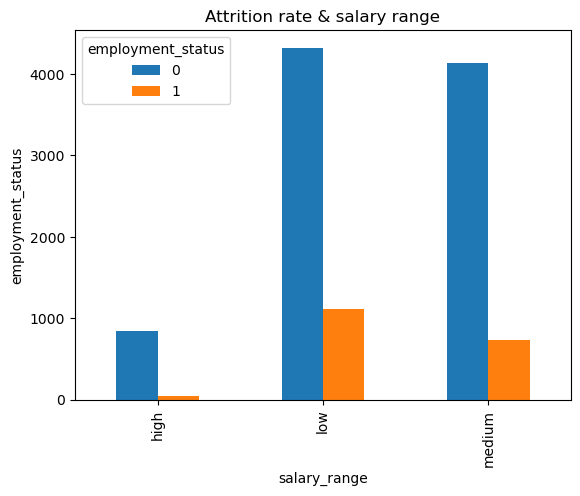

In [72]:

pd.crosstab(df_clean1.salary_range,df_clean1.employment_status).plot(kind='bar')
plt.title('Attrition rate & salary range')
plt.xlabel('salary_range')
plt.ylabel('employment_status')



* Employees in the high salary range account for the lowest count of employees leaving the company
* Employees in the low salary range account for the highest count of employees leaving the company

## Depertment Analysis

## Attrition rate per department

Text(0, 0.5, 'employment_status')

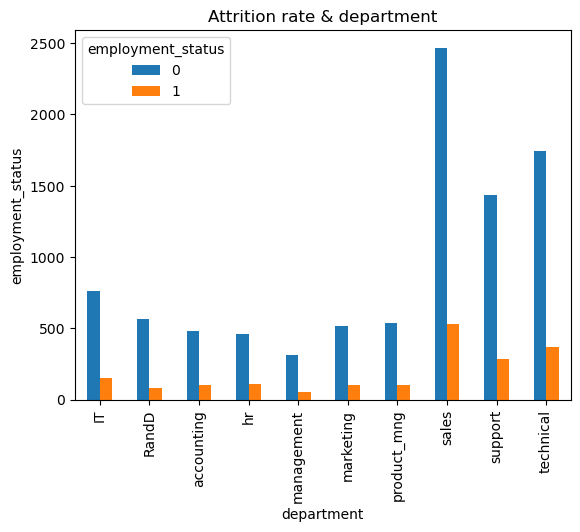

In [73]:
pd.crosstab(df_clean1.department,df_clean1.employment_status).plot(kind='bar')
plt.title('Attrition rate & department')
plt.xlabel('department')
plt.ylabel('employment_status')


In [74]:
crosstab = pd.crosstab(df_clean1['department'], df_clean1['employment_status'])

fig = px.bar(crosstab, x=crosstab.index, y=crosstab.columns,
             labels={'x': 'Department', 'y': 'Count', 'color': 'Employment Status'},
             title='Attrition rate per department',
             opacity=0.8)

# Adjust plot size
fig.update_layout(height=500, width=800)

fig.show()

* Management department accounts for the lowest number of individuals leaving the company
* sales department accounts for the highest number of individuals leaving the company


## Project count analysis


In [75]:
y=df_clean1.groupby("project_count").size().reset_index().rename(columns={0:"n"})
y
# Create a pie chart
fig = px.pie(y, 
             names="project_count",
             values="n",
             title='Salary Range Distribution')

# Show the plot
fig.show()

In [76]:
df_clean3 = df_clean1.groupby('department')['project_count'].count().reset_index()


fig = px.bar(df_clean3, x ="department", y = "project_count", text="project_count", color = "department",
             title="Depertment and project count",
             labels = {"department" : "department", "project_count": "count"} ,
             width=800, height=500)

# Increase bar width for better visibility
fig.update_traces(marker=dict(line=dict(width=1)))

fig.update_layout(height=900, width=900)

fig.show()

In [77]:
# count of each number of projects
projects_counts = df_clean1.pivot_table(index= "project_count", aggfunc = "size")
projects_counts  = projects_counts .rename_axis("project_count").reset_index(name="count")
projects_counts

project_count  count
0              2   1514
1              3   3302
2              4   3438
3              5   2030
4              6    738
5              7    145

Text(0, 0.5, 'employment_status')

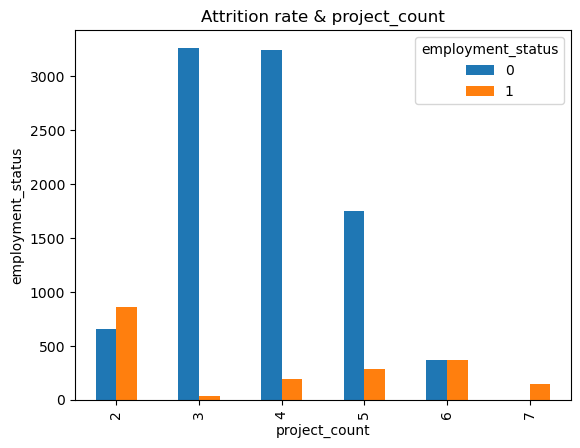

In [78]:
pd.crosstab(df_clean1.project_count,df_clean1.employment_status).plot(kind='bar')
plt.title('Attrition rate & project_count')
plt.xlabel('project_count')
plt.ylabel('employment_status')

In [79]:
crosstab2 = pd.crosstab(df_clean1['project_count'], df_clean1['employment_status'])

fig = px.bar(crosstab2, x=crosstab2.index, y=crosstab2.columns,
             labels={'x': 'Project Count', 'y': 'Count', 'color': 'Employment Status'},
             title='Attrition rate per department',
             opacity=0.8)

# Adjust plot size
fig.update_layout(height=800, width=800)

fig.show()

* When the number of project is extremely low, or high, employees are more likely to leave

In [80]:
pd.crosstab([df_clean1.department], df_clean1.project_count, values=df_clean1.project_count, aggfunc=(['count']))

count                        
project_count     2    3    4    5    6   7
department                                 
IT              125  278  258  184   58  12
RandD            65  213  196  129   39   7
accounting       75  172  174  113   41   8
hr               84  183  188   76   32   7
management       44  100  118   69   22   7
marketing        90  197  191   99   31   9
product_mng     100  179  196  110   48   8
sales           439  875  926  526  196  35
support         219  501  537  331  114  19
technical       273  604  654  393  157  33

## Promotion Analysis


In [81]:
promotion_counts = df_clean1.pivot_table(index= "promotion_last_5years", aggfunc = "size")
promotion_counts = promotion_counts .rename_axis("promotion_last_5years").reset_index(name="count")
promotion_counts

promotion_last_5years  count
0                      0  11006
1                      1    161

In [82]:
pd.crosstab([df_clean1.promotion_last_5years], df_clean1.salary_range, values=df_clean1.salary_range, aggfunc=(['count']))

count             
salary_range           high   low medium
promotion_last_5years                   
0                       858  5396   4752
1                        26    33    102

In [83]:
#pd.crosstab([df_clean1.promotion_last_5years], df_clean1.department, values=df_clean1.department, aggfunc=(['count']))

In [84]:
# Empoloyees who left
df_clean1["employment_status"].value_counts()

0    9285
1    1882
Name: employment_status, dtype: int64

In [85]:
crosstab3 = pd.crosstab(df_clean1['promotion_last_5years'], df_clean1['employment_status'])

# Reshape the crosstab DataFrame using melt
crosstab3_melted = crosstab3.reset_index().melt(id_vars='promotion_last_5years', var_name='employment_status', value_name='count')

# Create bar chart using Plotly Express
fig = px.bar(crosstab3_melted, x='promotion_last_5years', y='count', color='employment_status',
             labels={'promotion_last_5years': 'Promotion in Last 5 Years', 'count': 'Count', 'employment_status': 'Employment Status'},
             title='Attrition rate & propotion',
             opacity=0.8)

# Adjust plot size
fig.update_layout(height=1800, width=800)

fig.show()

In [86]:
pd.crosstab([df_clean1.promotion_last_5years], df_clean1.employment_status, values=df_clean1.employment_status, aggfunc=(['count']))

count      
employment_status         0     1
promotion_last_5years            
0                      9132  1874
1                       153     8

* Almost all employees who never had a promotion in the last 5 years left

## Attrition rate and workplace accident

In [87]:
pd.crosstab([df_clean1.workplace_acciedent_count], df_clean1.employment_status, values=df_clean1.employment_status, aggfunc=(['count']))

count      
employment_status             0     1
workplace_acciedent_count            
0                          7684  1781
1                          1601   101

* workplace accident is not a determinant of  an employee  staying or leaving the company

In [88]:
df_final = pd.DataFrame(df_clean1)
df_final.to_csv("HR_clean.csv")


In [89]:
df_clean.columns

Index(['satisfaction_level', 'last_evaluation_score', 'project_count',
       'average_monthly_hours', 'years_of_working',
       'workplace_acciedent_count', 'employment_status',
       'promotion_last_5years', 'department', 'salary_range'],
      dtype='object')

## Feature Selection

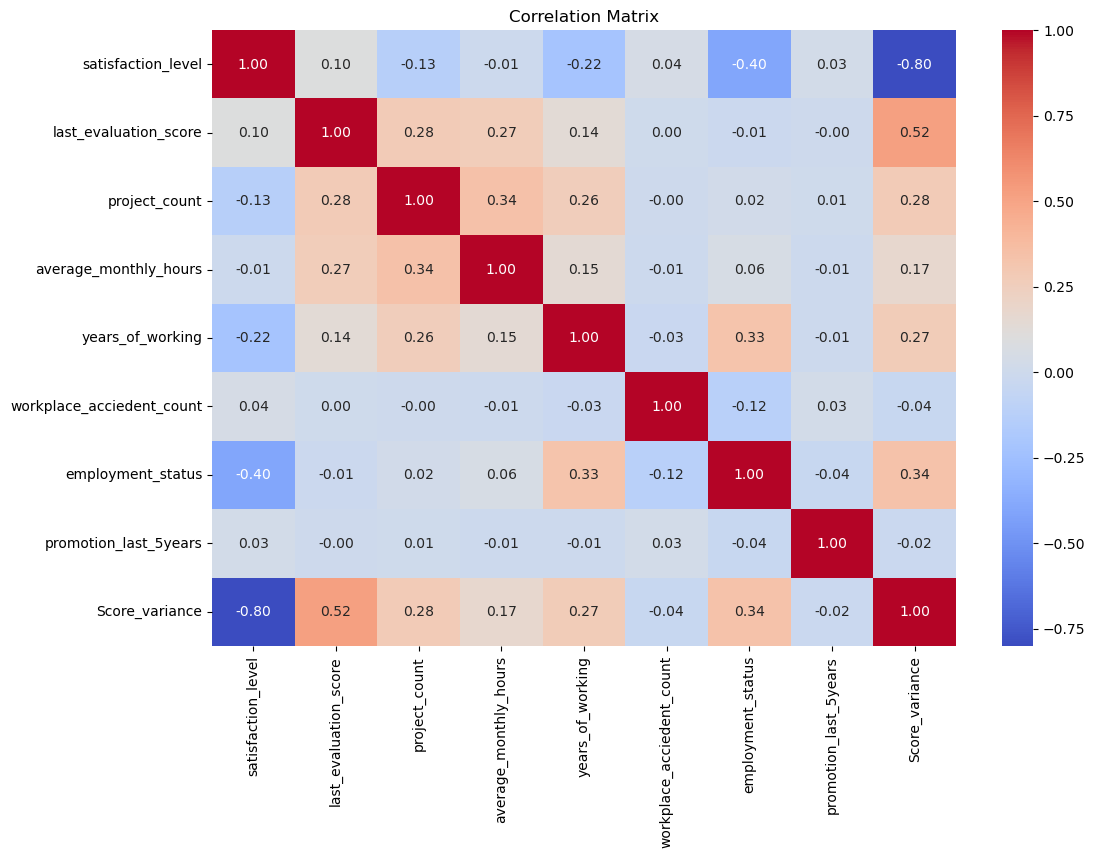

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df_clean1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

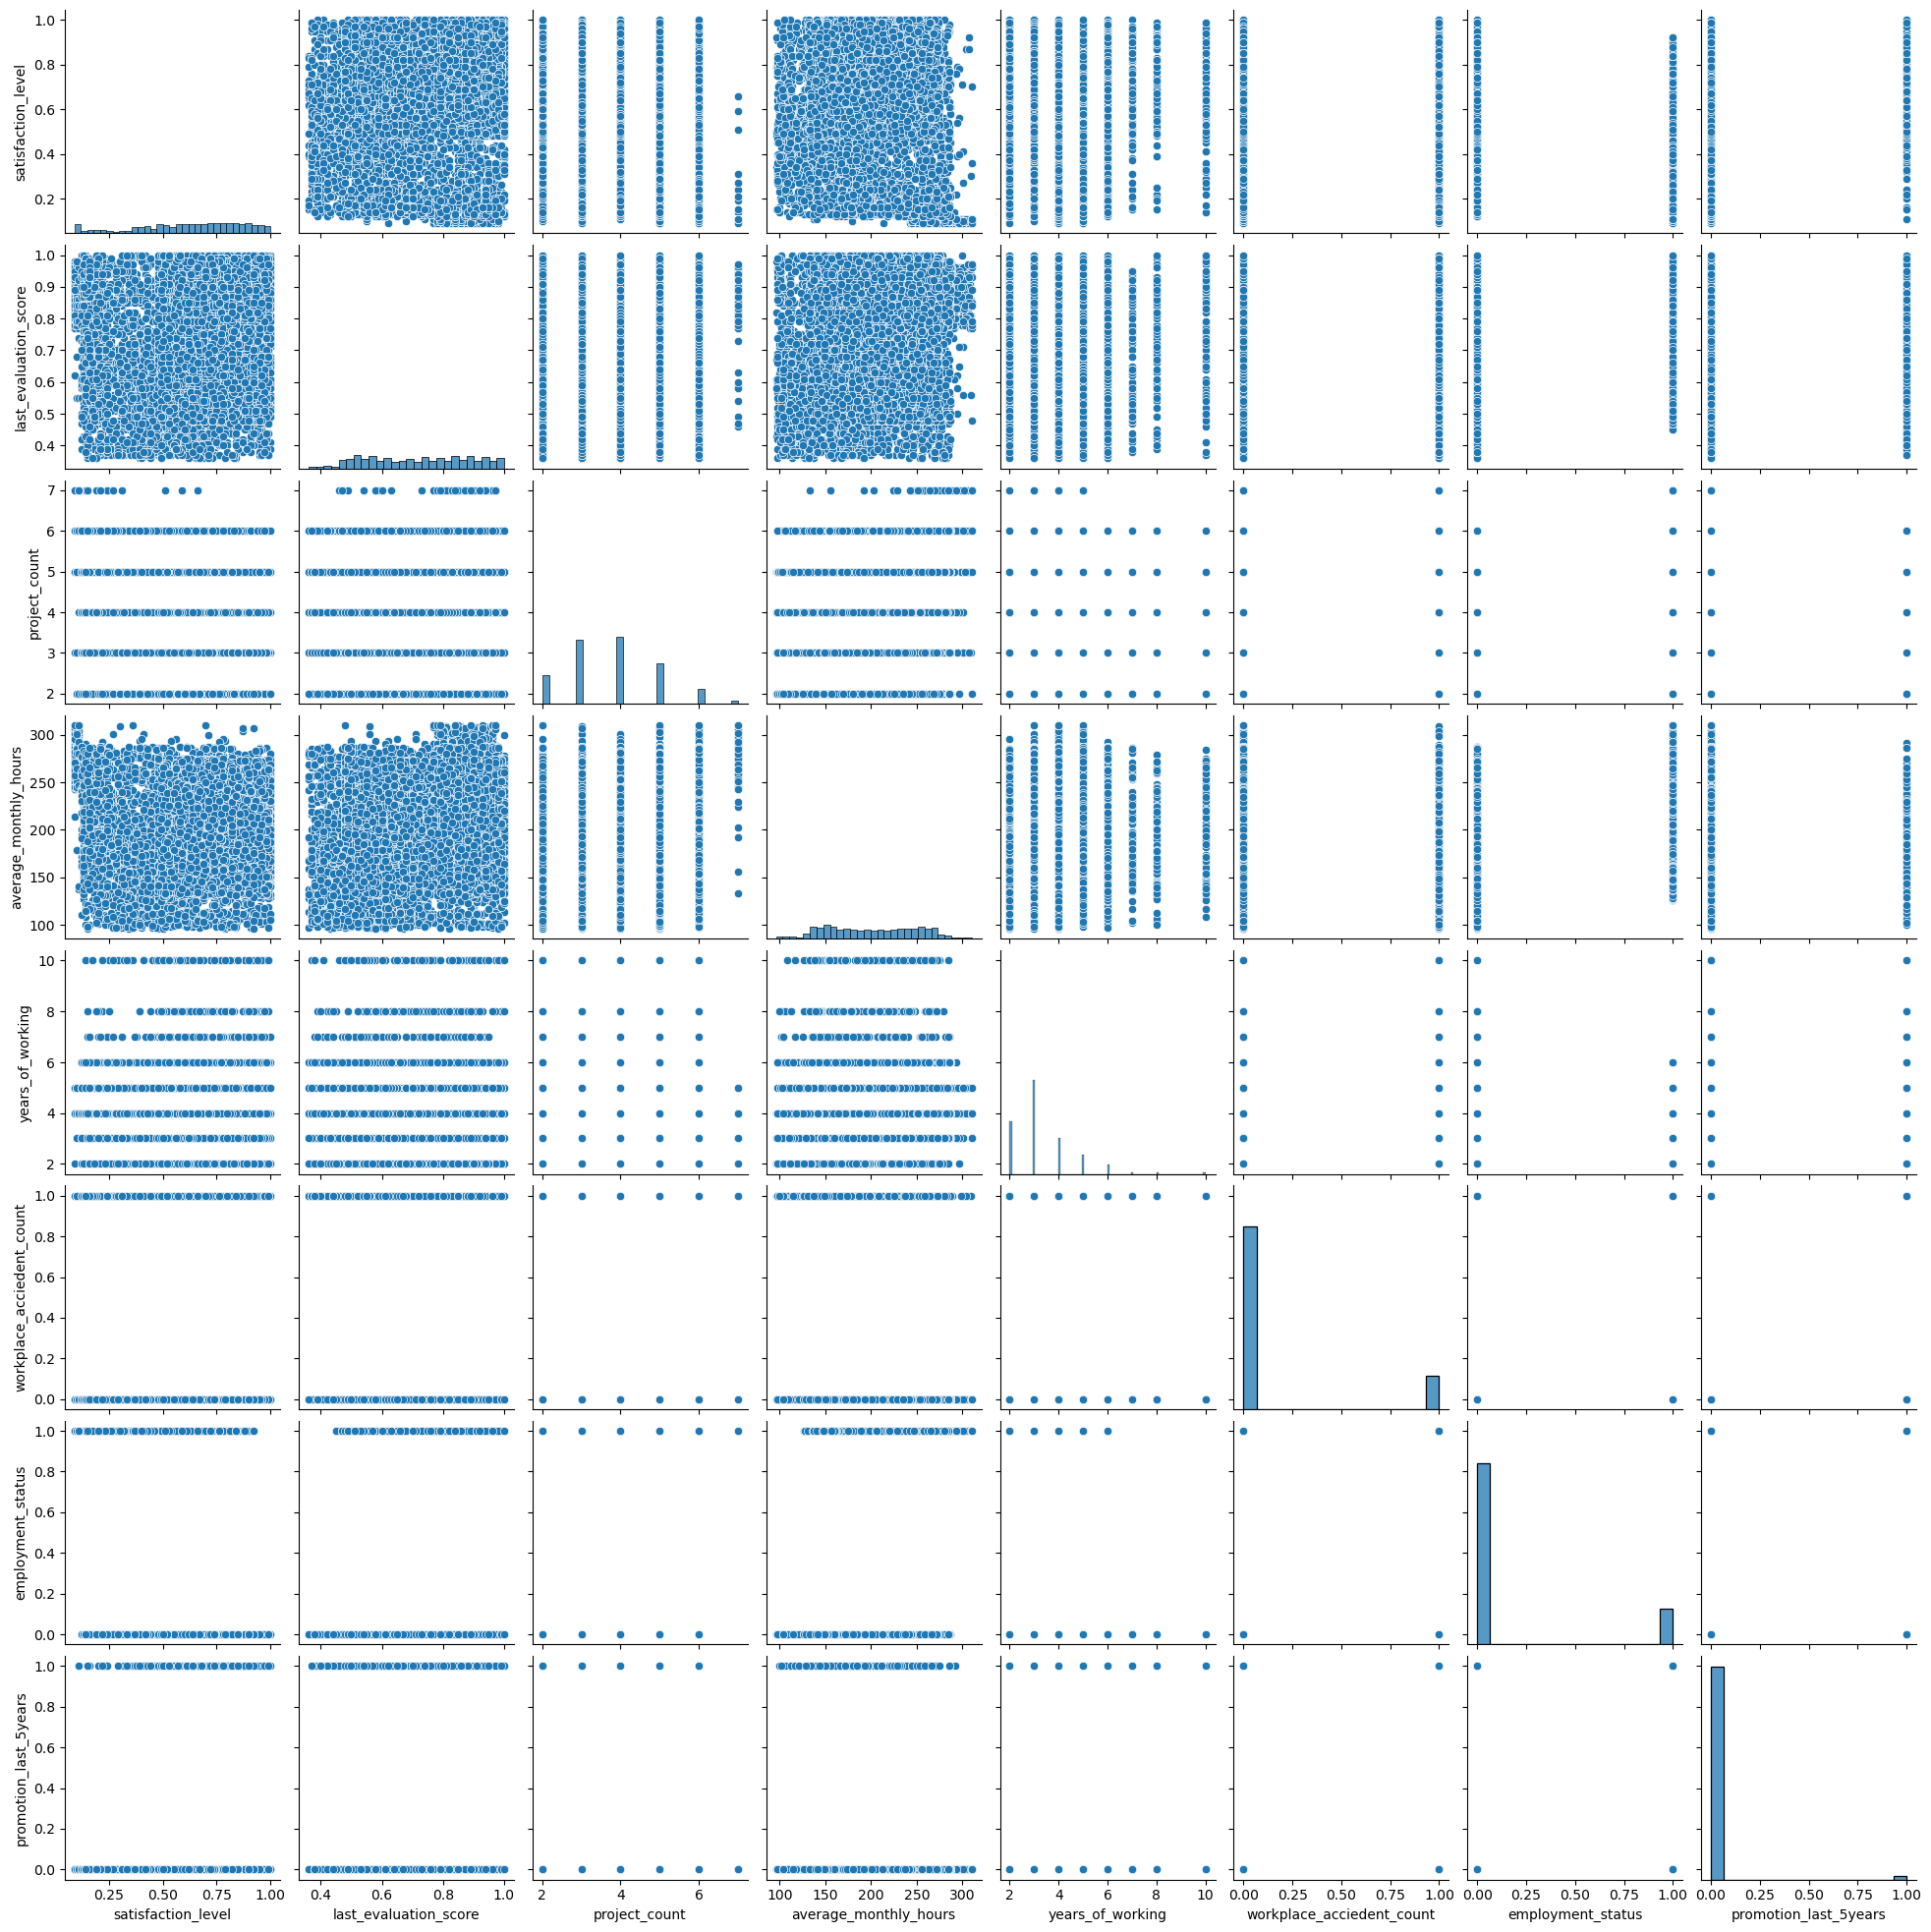

In [93]:
sns.pairplot(df_clean)
plt.show()

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





In [96]:
# Caterorical outcome
n = pd.unique(df_model['employment_status'])
print("Distinct values of target variable : ", n)
sns.countplot(x='employment_status',data=df, palette='hls')

NameError: name 'df_model' is not defined

💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Classification.]

### Identify the types of models most appropriate for this task.

[Random Forest & Linear SMV]

### Modeling

Add as many cells as you need to conduct the modeling process.

- Get the daata ready
- Pick a model (based on your problem)/choose the right estimator/algoruthim for our problem
- Fit the model to the data
- make Predictions
- Evaluate the model
- Improve through experiments
- Save and relode your traning model



* Hacks
- categorical data (years of working, project count, workplace accident, promotion last year,salary_range )
- target variable (Employment satatus)
- x = all other columns apart from employment status
- y = employment status
- we are predicting a category

In [98]:
df_clean1.groupby('employment_status').mean()

satisfaction_level  last_evaluation_score  project_count  \
employment_status                                                             
0                            0.674999               0.716906       3.774798   
1                            0.419527               0.710946       3.841658   

                   average_monthly_hours  years_of_working  \
employment_status                                            
0                             198.914378          2.977491   
1                             206.213603          3.758767   

                   workplace_acciedent_count  promotion_last_5years  \
employment_status                                                     
0                                   0.172429               0.016478   
1                                   0.053666               0.004251   

                   Score_variance  
employment_status                  
0                        0.041906  
1                        0.291419

In [97]:
df_model= pd.DataFrame(df_clean1)
df_model = df_model.drop('workplace_acciedent_count', axis=1)
df_model.head()

satisfaction_level  last_evaluation_score  project_count  \
0                0.38                   0.53              2   
2                0.11                   0.88              7   
3                0.72                   0.87              5   
4                0.37                   0.52              2   
5                0.41                   0.50              2   

   average_monthly_hours  years_of_working  employment_status  \
0                    157                 3                  1   
2                    272                 4                  1   
3                    223                 5                  1   
4                    159                 3                  1   
5                    153                 3                  1   

   promotion_last_5years department salary_range  Score_variance  
0                      0      sales          low            0.15  
2                      0      sales       medium            0.77  
3                      0      sales          low            0.15  
4                      0      sales          low            0.15  
5                      0      sales          low            0.09

In [ ]:
df_model = df_model.drop('last_evaluation_score', axis=1)
df_model.head()

## Confirming which data to transform cartegories into numbers

In [99]:
df_model["years_of_working"].value_counts()

3    5190
2    2910
4    2005
5    1062
Name: years_of_working, dtype: int64

In [100]:
df_model["project_count"].value_counts()

4    3438
3    3302
5    2030
2    1514
6     738
7     145
Name: project_count, dtype: int64

In [101]:
df_model["salary_range"].value_counts()

low       5429
medium    4854
high       884
Name: salary_range, dtype: int64

In [102]:
df_model["department"].value_counts()

sales          2997
technical      2114
support        1721
IT              915
RandD           649
product_mng     641
marketing       617
accounting      583
hr              570
management      360
Name: department, dtype: int64

In [104]:
#dummies = pd.get_dummies(df_model[["department", "salary_range" ]])
#dummies

## split the data

In [146]:
x = df_model.drop("employment_status", axis=1)
y = df_model["employment_status"]


In [147]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
categorical_features = ["department", "salary_range"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer ([(
                                    "one_hot",
                                    one_hot,
                                    categorical_features,)],
                                    remainder = "passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

array([[0.  , 0.  , 0.  , ..., 3.  , 0.  , 0.15],
       [0.  , 0.  , 0.  , ..., 4.  , 0.  , 0.77],
       [0.  , 0.  , 0.  , ..., 5.  , 0.  , 0.15],
       ...,
       [0.  , 0.  , 0.  , ..., 4.  , 0.  , 0.6 ],
       [1.  , 0.  , 0.  , ..., 3.  , 0.  , 0.23],
       [1.  , 0.  , 0.  , ..., 3.  , 0.  , 0.23]])

## Model 1 logistic Regression model

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2, random_state=0)

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [112]:
logreg.score(x_test, y_test)

0.8182632050134289

In [113]:
logreg.score(x_train, y_train)

0.8215605059890294

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1871
           1       0.40      0.22      0.29       363

    accuracy                           0.82      2234
   macro avg       0.63      0.58      0.59      2234
weighted avg       0.79      0.82      0.80      2234



## Explanation


## Fine tuning the model using standard Scaling

In [115]:
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2, random_state=0)

In [116]:
Scaler = StandardScaler()


In [117]:
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.transform(x_test)


In [118]:
logreg1 = LogisticRegression()
logreg1.fit(x_train, y_train)

LogisticRegression()

In [119]:
logreg1.score(x_test, y_test)

0.8191584601611459

In [120]:
logreg1.score(x_train, y_train)

0.82200828389119

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg1.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1871
           1       0.41      0.24      0.30       363

    accuracy                           0.82      2234
   macro avg       0.63      0.59      0.60      2234
weighted avg       0.79      0.82      0.80      2234



In [122]:
y_pred = logreg1.predict(x_test)

In [123]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 36.72222222222221, 'Predicted Values')

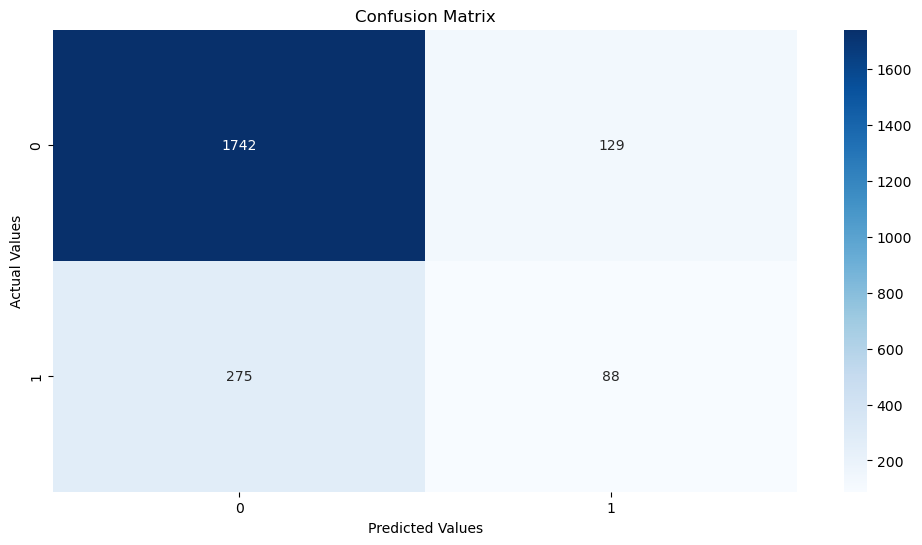

In [124]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

## Fine tuning the model using regularization

In [125]:
logreg2 = LogisticRegression()

#simple logistic regression with lasso regularization
logreg2 = LogisticRegression(C = 0.1, class_weight= 'balanced', penalty= 'l2', solver= 'lbfgs')
logreg2.fit(x_train, y_train)
logreg2.score(x_test, y_test)

0.8254252461951657

In [126]:
logreg2.score(x_train, y_train)

0.8370088436135676

In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg2.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1871
           1       0.48      0.91      0.63       363

    accuracy                           0.83      2234
   macro avg       0.73      0.86      0.76      2234
weighted avg       0.90      0.83      0.84      2234



In [128]:
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2, random_state=42)
logreg2 = LogisticRegression(C = 0.1, class_weight= 'balanced', penalty= 'l2', solver= 'saga')

# Set the regularization type (L1, L2, Elastic Net)
penalty = 'l2'

# Set the regularization strength (C)
C = 0.01

# Create a logistic regression model
logreg2 = LogisticRegression(penalty=penalty, C=C)

# Train the model on the training set
logreg2.fit(x_train, y_train)

# Evaluate the model on the test set
accuracy = logreg2.score(x_test, y_test)

print(f'Test accuracy: {accuracy:.2f}')

Test accuracy: 0.81


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [129]:
y_pred = logreg2.predict(x_test)

Text(0.5, 36.72222222222221, 'Predicted Values')

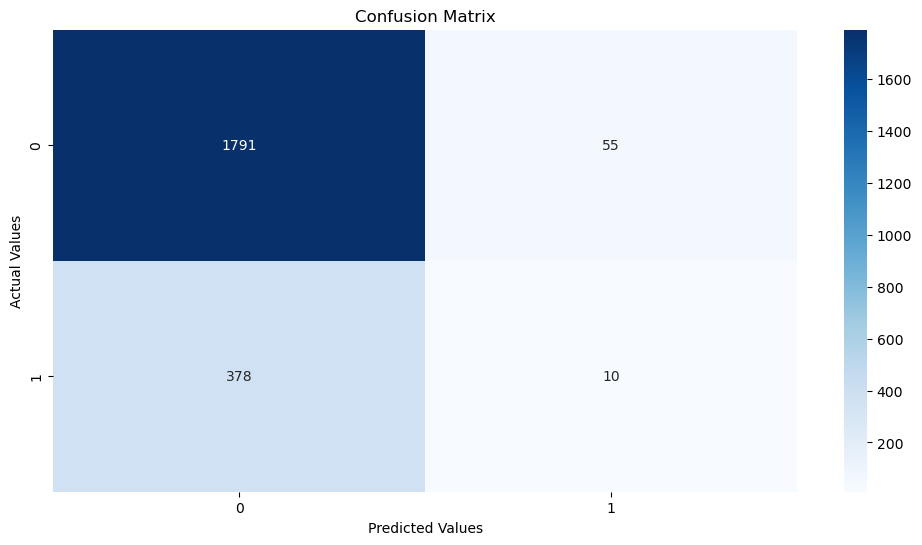

In [130]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

## feature selection

In [159]:
from sklearn.feature_selection import RFE





In [158]:
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2, random_state=0)

logreg4 = LogisticRegression()
logreg4.fit(x_train, y_train)
rfe = RFE(logreg4, n_features_to_select=5)
rfe.fit(x_train, y_train)

selected_features_indices = rfe.support_
selected_features = np.array(range(x_train.shape[1]))[selected_features_indices]

x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

logreg5_selected = LogisticRegression()
logreg5_selected.fit(x_train_rfe, y_train)

y_pred = logreg5_selected.predict(x_test_rfe)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Admin\anaconda3\lib\site-packages

Model Accuracy: 0.841987466427932


In [160]:
y_pred = logreg5_selected.predict(x_test_rfe)

Text(0.5, 36.72222222222221, 'Predicted Values')

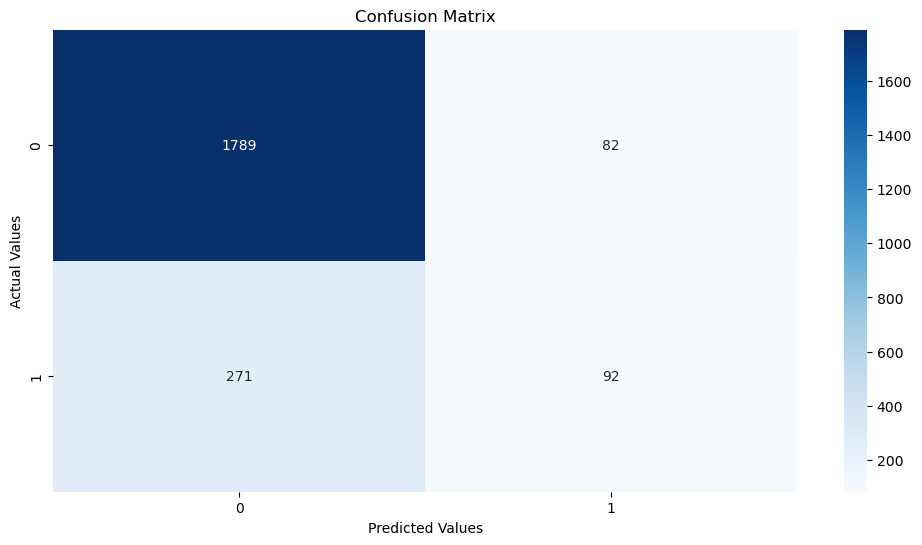

In [161]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

## Model 2- Random Forest

In [172]:
## classification
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
 #keep the default parameters

In [173]:
np.random.seed(42)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split (transformed_x, y,test_size=0.2)
model.fit(x_train, y_train)

RandomForestClassifier()

In [174]:
model.score(x_test, y_test)

0.9838854073410922

In [175]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1846
           1       0.98      0.92      0.95       388

    accuracy                           0.98      2234
   macro avg       0.98      0.96      0.97      2234
weighted avg       0.98      0.98      0.98      2234



In [180]:
y_pred = model.predict(x_test)

Text(0.5, 36.72222222222221, 'Predicted Values')

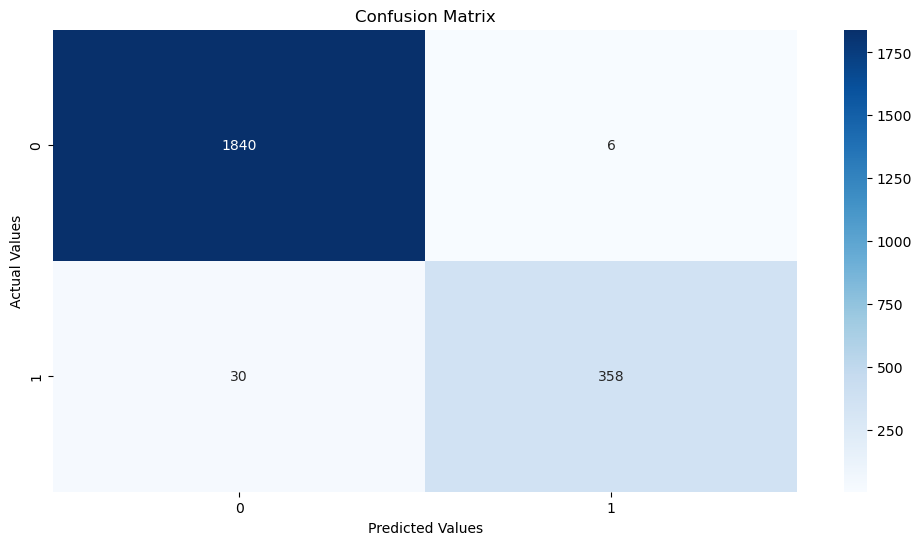

In [178]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [179]:
from sklearn import metrics
print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(y_test, 
                             model.predict(X_test))*100)

Training Accuracy :  100.0
Validation Accuracy :  98.38854073410921


## Model 3 Linear SMV model


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = df_model.drop("employment_status", axis=1)
y = df_model["employment_status"]


x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

clf = LinearSVC()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

In [ ]:
clf.predict(x_test)


In [ ]:
y_preds = clf.predict(x_test)
np.mean (y_preds==y_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(x_test)))

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this project